# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer # Convert text to numerical reprentation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # using regressor for continuos target
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
destination_df = pd.read_csv('Expanded_Destinations.csv')
reviews_df = pd.read_csv('Final_Updated_Expanded_Reviews.csv')
userhistory_df = pd.read_csv('Final_Updated_Expanded_UserHistory.csv')
users_df = pd.read_csv('Final_Updated_Expanded_Users.csv')

# Data Preprocessing 

In [4]:
destination_df.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [5]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [6]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [7]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [8]:
# Merge all the Datasets into one 

destination_reviews_df = pd.merge(destination_df, reviews_df , on = 'DestinationID', how = 'inner')

des_rev_userhistory_df = pd.merge(destination_reviews_df , userhistory_df , on = 'UserID' , how = 'inner')

df = pd.merge(des_rev_userhistory_df , users_df , on = 'UserID', how = 'inner'
                                   )

df


,DestinationID_x,Name_x,State,Type,Popularity,BestTimeToVisit,ReviewID,UserID,Rating,ReviewText,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!,517,872,2024-01-01,4,Isha,isha@example.com,"City, Historical",Female,2,1
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!,519,824,2024-03-20,1,Isha,isha@example.com,"City, Historical",Female,2,1
2,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!,657,619,2024-03-20,2,Isha,isha@example.com,"City, Historical",Female,2,1
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar,869,126,5,Loved the beaches!,314,983,2024-02-15,3,Isha,isha@example.com,"City, Historical",Female,1,0
4,287,Goa Beaches,Goa,Beach,9.171525,Nov-Mar,831,126,4,A historical wonder,314,983,2024-02-15,3,Isha,isha@example.com,"City, Historical",Female,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,983,Jaipur City,Rajasthan,City,9.080216,Oct-Mar,642,531,3,A historical wonder,733,367,2024-01-01,4,Aanya,aanya@example.com,"City, Historical",Female,1,1
989,989,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,5,353,2,Loved the beaches!,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
990,992,Goa Beaches,Goa,Beach,8.114747,Nov-Mar,801,213,1,A historical wonder,475,230,2024-01-01,2,Aarav,aarav@example.com,"City, Historical",Male,1,2
991,992,Goa Beaches,Goa,Beach,8.114747,Nov-Mar,801,213,1,A historical wonder,756,905,2024-03-20,4,Aarav,aarav@example.com,"City, Historical",Male,1,2


In [9]:
df.shape

(993, 20)

In [10]:
df.duplicated().sum()  #check for duplicated values

0

In [11]:
df.isnull().sum()  # check for missing values

DestinationID_x     0
Name_x              0
State               0
Type                0
Popularity          0
BestTimeToVisit     0
ReviewID            0
UserID              0
Rating              0
ReviewText          0
HistoryID           0
DestinationID_y     0
VisitDate           0
ExperienceRating    0
Name_y              0
Email               0
Preferences         0
Gender              0
NumberOfAdults      0
NumberOfChildren    0
dtype: int64

# Visualization

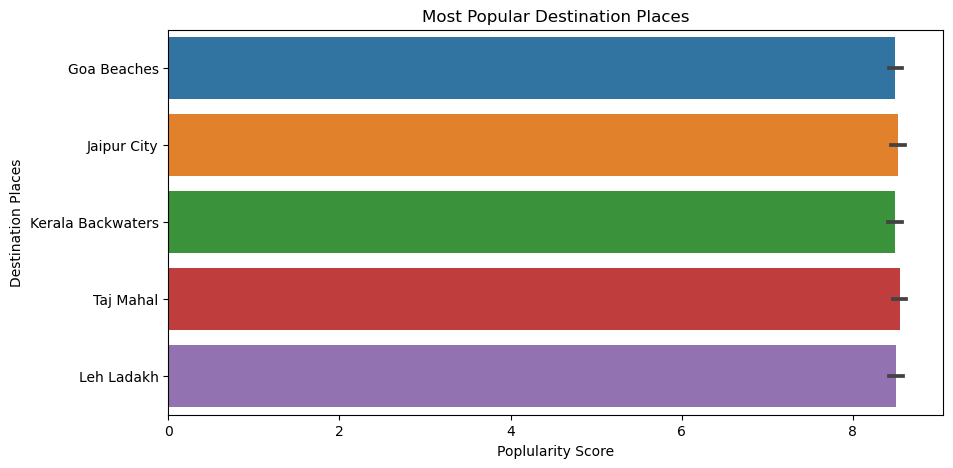

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Popularity' , y = 'Name' , data = destination_df.sort_values(by = 'Popularity', ascending = False))
plt.xlabel('Poplularity Score')
plt.ylabel('Destination Places')
plt.title('Most Popular Destination Places' )
plt.show()

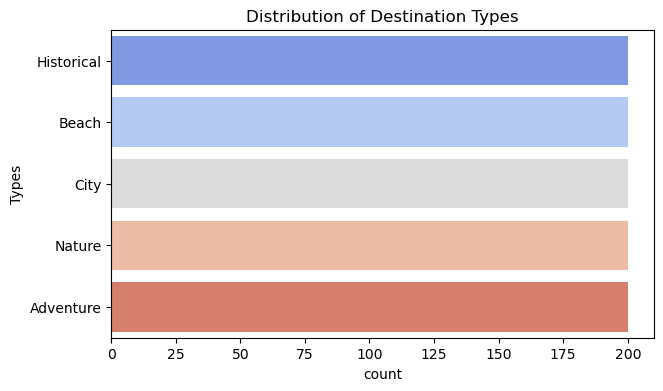

In [13]:
# Destinatoion Types Distribution
plt.figure(figsize=(7, 4))
sns.countplot(y = 'Type', data = destination_df , order = destination_df['Type'].value_counts().index,  palette = 'coolwarm')
plt.title('Distribution of Destination Types')
plt.xlabel('count')
plt.ylabel('Types')
plt.show()



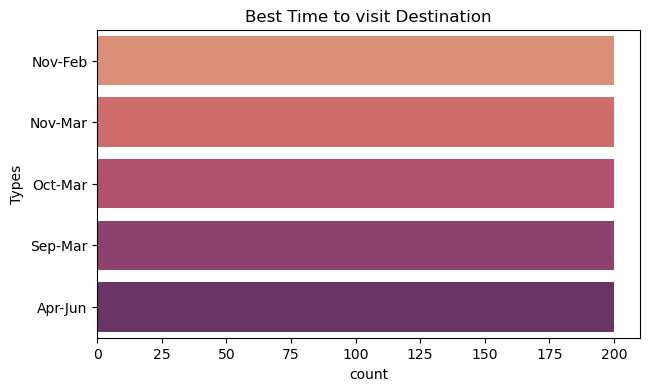

In [14]:
# Best Time to visit Destination
plt.figure(figsize=(7, 4))
sns.countplot(y = 'BestTimeToVisit', data = destination_df , order = destination_df['BestTimeToVisit'].value_counts().index,  palette = 'flare')
plt.title('Best Time to visit Destination')
plt.xlabel('count')
plt.ylabel('Types')
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


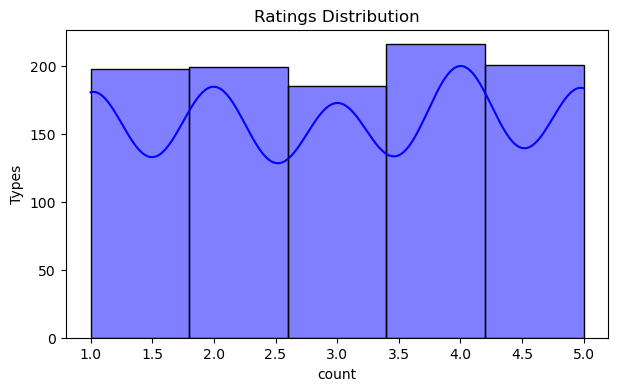

In [15]:
# Revies Rating Histplot
plt.figure(figsize=(7, 4))
sns.histplot(reviews_df['Rating'] , bins = 5 , kde = True , color = 'blue')
plt.title('Ratings Distribution')
plt.xlabel('count')
plt.ylabel('Types')
plt.show()


# Content Based Recommendation

In [16]:
df['Type']

0       Beach
1       Beach
2       Beach
3      Nature
4       Beach
        ...  
988      City
989    Nature
990     Beach
991     Beach
992     Beach
Name: Type, Length: 993, dtype: object

In [17]:
df['features'] = df['Type'] + " " + df['State'] + " "  + df['BestTimeToVisit']  + " " + df['Preferences'] 

In [18]:
df
vectorizer = TfidfVectorizer(stop_words='english')
destination_features = vectorizer.fit_transform(df['features'])
# destination_features.toarray()
cosine_sim = cosine_similarity(destination_features , destination_features)

In [19]:
cosine_sim

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.86389233],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.86389233],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.86389233],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.86389233],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.86389233],
       [0.86389233, 0.86389233, 0.86389233, ..., 0.86389233, 0.86389233,
        1.        ]])

# Recommendation Function


In [20]:
def recommend_destinations(user_id , userhistory_df, destination_df, cosine_sim):
    # this function retures dataframe with recommend destinations and their details

    # get the destination that user has visited
    visited_destinations = userhistory_df[userhistory_df['UserID'] == user_id]['DestinationID'].values

    # calculate similarity scores for visited destinations
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis = 0)

    # recommend top 5  destinations where the user has not visited
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]

    recommendations = []

    for idx in recommended_destinations_idx:
        if destination_df.iloc[idx]['DestinationID'] not in visited_destinations:
            # top recommendations
            recommendations.append(destination_df.iloc[idx][['DestinationID', 'Name', 'State', 'Type', 'BestTimeToVisit']].to_dict())


        if len(recommendations) >= 5 :
            break

    
    return pd.DataFrame(recommendations)


recommended_destinations = recommend_destinations(6, userhistory_df , destination_df , cosine_sim)
recommended_destinations

,DestinationID,Name,State,Type,BestTimeToVisit
0,993,Jaipur City,Rajasthan,City,Oct-Mar
1,326,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb
2,339,Kerala Backwaters,Kerala,Nature,Sep-Mar
3,338,Jaipur City,Rajasthan,City,Oct-Mar
4,337,Goa Beaches,Goa,Beach,Nov-Mar


# Step 4 :  Collaborative Filtering 

In [21]:
# Create a user-item matrix 
# create a matrix where rows represents rows and columns represents destinations. The value will represent the ratings or experience of
# the user for each destination.

user_item_matrix = userhistory_df.pivot(index='UserID' , columns = 'DestinationID', values = 'ExperienceRating')
# filling missing values with 0 indicating no rating / experience
user_item_matrix.fillna(0, inplace = True)

# compute cosing similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity
# df.columns

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
# Compute the cosine similarity between users based on the user-item matrix

def collaborative_recommend(user_id , user_similarity , user_item_matrix , destination_df):
    # find similar users
    similar_users = user_similarity[user_id - 1]

    # Get top 5 most similar users
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]

    # destination like by similar users
    similar_users_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis = 0)

    recommended_destinations_ids = similar_users_ratings.sort_values(ascending = False).head(5).index
    
    # recommend top 5 destinations
    recommendations = destination_df[destination_df['DestinationID'].isin(recommended_destinations_ids)][[
        'DestinationID' , 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit']]

    return recommendations

# Example : collaborative recommendations for user 1
collaborative_recommendations = collaborative_recommend(11, user_similarity, user_item_matrix, destination_df)
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
367,368,Jaipur City,Rajasthan,City,8.008252,Oct-Mar
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun
969,970,Leh Ladakh,Jammu and Kashmir,Adventure,9.013101,Apr-Jun


# Step 6 : User Input feature based recommendations

In [23]:
df

,DestinationID_x,Name_x,State,Type,Popularity,BestTimeToVisit,ReviewID,UserID,Rating,ReviewText,...,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,features
0,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!,...,872,2024-01-01,4,Isha,isha@example.com,"City, Historical",Female,2,1,"Beach Goa Nov-Mar City, Historical"
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!,...,824,2024-03-20,1,Isha,isha@example.com,"City, Historical",Female,2,1,"Beach Goa Nov-Mar City, Historical"
2,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!,...,619,2024-03-20,2,Isha,isha@example.com,"City, Historical",Female,2,1,"Beach Goa Nov-Mar City, Historical"
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar,869,126,5,Loved the beaches!,...,983,2024-02-15,3,Isha,isha@example.com,"City, Historical",Female,1,0,"Nature Kerala Sep-Mar City, Historical"
4,287,Goa Beaches,Goa,Beach,9.171525,Nov-Mar,831,126,4,A historical wonder,...,983,2024-02-15,3,Isha,isha@example.com,"City, Historical",Female,1,0,"Beach Goa Nov-Mar City, Historical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,983,Jaipur City,Rajasthan,City,9.080216,Oct-Mar,642,531,3,A historical wonder,...,367,2024-01-01,4,Aanya,aanya@example.com,"City, Historical",Female,1,1,"City Rajasthan Oct-Mar City, Historical"
989,989,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,5,353,2,Loved the beaches!,...,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0,"Nature Kerala Sep-Mar Nature, Adventure"
990,992,Goa Beaches,Goa,Beach,8.114747,Nov-Mar,801,213,1,A historical wonder,...,230,2024-01-01,2,Aarav,aarav@example.com,"City, Historical",Male,1,2,"Beach Goa Nov-Mar City, Historical"
991,992,Goa Beaches,Goa,Beach,8.114747,Nov-Mar,801,213,1,A historical wonder,...,905,2024-03-20,4,Aarav,aarav@example.com,"City, Historical",Male,1,2,"Beach Goa Nov-Mar City, Historical"


In [24]:
data = pd.read_csv('final_df.csv')
data

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [25]:
# Select Relevant features


features = ['Name_x', 'State', 'Type', 'BestTimeToVisit', 'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren']
target = 'Popularity'   # Predicting Popularity

data[features]  # there are some col are in categorical form

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Female,1,1
1,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"City, Historical",Male,1,1
2,Jaipur City,Rajasthan,City,Oct-Mar,"Nature, Adventure",Male,1,1
3,Kerala Backwaters,Kerala,Nature,Sep-Mar,"Nature, Adventure",Female,2,0
4,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...
988,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
989,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
990,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2
991,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2


In [26]:
# Peform encoding for handling categorical variables

label_encoders = {}

for col in features:
    # print(col)
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le



In [27]:
X = data[features]
# print(X)
y = data[target]
# print(y)
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 42)

In [28]:
# Train model

model = RandomForestRegressor(random_state = 42)
model.fit(X_train , y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MSE : ", mean_squared_error(y_test, y_pred))

MSE :  0.30215968785605185


In [38]:
# Feature Based Prediction


def new_recommend_destinations(user_input , model , label_encoders , features, data):
    # Encode user input 
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]


    # convert Dataframe
    input_df = pd.DataFrame([encoded_input])

    # predict popularity
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity

user_input = {
    'Name_x':'Jaipur City', 
    'Type' : 'City',
    'State' : 'Rajasthan' , 
    'BestTimeToVisit' : 'Oct-Mar' ,
    'Preferences' : 'City, Historical', 
    'Gender' : 'Female' , 
    'NumberOfAdults' : 2 , 
    'NumberOfChildren' : 1
    
}



# make a recommendation 

predicted_popularity = new_recommend_destinations(user_input , model , label_encoders , features, data)

# Print the predicted popularity and the recommendation destination details

print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


In [40]:
import pickle 

pickle.dump(model, open("model.pkl", 'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl", 'wb'))